# Heart Disease Prediction ML Model (project 1)

In [835]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##Data set import and preprocessing


In [836]:
import pandas as pd

# Replace with the raw link to your CSV file on GitHub
github_csv_url = 'https://raw.githubusercontent.com/saikatmaji2006/Heart-Disease-Predictor-Model-Using-Logistic-Regression/refs/heads/main/heart.csv'
github_csv_url_1 = 'https://raw.githubusercontent.com/saikatmaji2006/Heart-Disease-Predictor-Model-Using-Logistic-Regression/refs/heads/main/heart_cleveland_upload.csv'
try:
    heart_data = pd.read_csv(github_csv_url)
    df = pd.read_csv(github_csv_url_1)
    display(df.head())
except Exception as e:
    print(f"Error loading data from GitHub: {e}")
    print("Please ensure the URL is correct and the file exists in the repository.")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [837]:

df.rename(columns={"condition": "target"}, inplace=True)
heart_data = pd.concat([heart_data, df], ignore_index=True)



In [838]:
heart_data = heart_data.drop_duplicates()

In [839]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [840]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1317,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
1318,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
1319,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
1320,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
1321,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [841]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, 0 to 1321
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       599 non-null    int64  
 1   sex       599 non-null    int64  
 2   cp        599 non-null    int64  
 3   trestbps  599 non-null    int64  
 4   chol      599 non-null    int64  
 5   fbs       599 non-null    int64  
 6   restecg   599 non-null    int64  
 7   thalach   599 non-null    int64  
 8   exang     599 non-null    int64  
 9   oldpeak   599 non-null    float64
 10  slope     599 non-null    int64  
 11  ca        599 non-null    int64  
 12  thal      599 non-null    int64  
 13  target    599 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 70.2 KB


In [842]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [843]:
#statistical data measure
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.00000,599.000000,599.000000
mean,54.480801,0.679466,1.555927,131.647746,246.921536,0.146912,0.759599,149.584307,0.327212,1.049249,1.003339,0.69783,1.580968,0.502504
std,9.041481,0.467072,1.163748,17.647831,51.833011,0.354314,0.827397,22.903224,0.469588,1.162814,0.733792,0.97314,1.091027,0.500412
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.00000,2.000000,1.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,1.500000,166.000000,1.000000,1.600000,2.000000,1.00000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.00000,3.000000,1.000000


In [844]:
#count target values
heart_data['target'].value_counts()

,count
target,
1,301
0,298


In [845]:
#split data into features and target
x=heart_data.drop(columns='target',axis=1)
y=heart_data['target']

In [846]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


##Splitting into train, test and validation data



In [847]:
x_train_full , x_test , y_train_full , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
x_train , x_val , y_train, y_val =train_test_split(x_train_full,y_train_full, test_size=0.25,stratify=y_train_full,random_state=42)

In [848]:
y_train.value_counts()

,count
target,
1,181
0,178


##Model Trainning

In [849]:
model = LogisticRegression()

In [850]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##Fine Tuning to get Maximimum Recall

In [851]:
y_proba = model.predict_proba(x_val)[:, 1]
print(y_proba)

[0.26804195 0.89213144 0.85953486 0.79008641 0.29424947 0.53762408
 0.84152179 0.92254148 0.66937264 0.06345491 0.16931023 0.84541472
 0.44978157 0.8916323  0.77174368 0.29534829 0.57791272 0.62680162
 0.64966128 0.31953087 0.79285108 0.35810668 0.75010163 0.91068791
 0.82194463 0.63722004 0.38412504 0.92208967 0.33128198 0.82566557
 0.30922272 0.48439948 0.84624066 0.78929665 0.84940934 0.8031837
 0.55253123 0.79339143 0.17265093 0.35427216 0.8175935  0.31671751
 0.28831352 0.26350318 0.60793495 0.6568487  0.82872823 0.17247799
 0.37174058 0.31232872 0.78142497 0.88366976 0.26564538 0.78112155
 0.75190863 0.84522212 0.58078304 0.4834883  0.84208458 0.77067079
 0.30110736 0.67636802 0.5990491  0.21430319 0.67455779 0.37642106
 0.33440264 0.22400058 0.38879532 0.16917657 0.15170864 0.17339385
 0.56593363 0.10942201 0.0787496  0.4025346  0.4785766  0.5235088
 0.81004606 0.24401188 0.47738184 0.77936193 0.20786196 0.51268647
 0.6632976  0.27353933 0.77403575 0.90118286 0.60841657 0.633179

In [852]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_val, y_proba)

print(recall)
print(precision)

[1.         0.98333333 0.98333333 0.98333333 0.98333333 0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667 0.95
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.91666667 0.91666667 0.91666667
 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
 0.9        0.9        0.88333333 0.88333333 0.88333333 0.88333333
 0.88333333 0.88333333 0.86666667 0.86666667 0.86666667 0.86666667
 0.85       0.83333333 0.83333333 0.83333333 0.81666667 0.8
 0.8        0.78333333 0.78333333 0.78333333 0.78333333 0.78333333
 0.76666667 0.76666667 0.76666667 0.75       0.73333333 0.71666667
 0.71666667 0.7        0.68333333 0.68333333 0.68333333 0.66666667
 0.65       0.63333333 0.61666667 0.61666667 0.61666667 0.6
 0.6        0.58333333 0.56666667 0.55       0.55       0.55
 0.53333333 0.51666667 0.5        0.48333333 0.46666667 0.45
 0.45       0.43333333 0.43

In [853]:

best_threshold = None
best_precision = 0

for p, r, t in zip(precision, recall, thresholds):
    if r >= .98 and p > best_precision:
        best_precision = p
        best_threshold = t

print(f"Best threshold with recall=1.0: {best_threshold:.4f}, precision: {best_precision:.4f}")
y_val_proba = model.predict_proba(x_val)[:, 1]
y_val_pred = (y_val_proba >= best_threshold).astype(int)

from sklearn.metrics import recall_score
recall1 = recall_score(y_val, y_val_pred)

print(f"Recall using chosen threshold: {recall1:.4f}")
print(confusion_matrix(y_val, y_val_pred))


Best threshold with recall=1.0: 0.1517, precision: 0.5086
Recall using chosen threshold: 0.9833
[[ 3 57]
 [ 1 59]]


## Model Evaluation

In [854]:
def model_predict_with_threshold(x,model = model , threshold = 0.1517) :
  y_proba = model.predict_proba(x)[:,1]
  return (y_proba>=threshold).astype(int)

x_train_prediction=model_predict_with_threshold(x_train)
train_accuracy=accuracy_score(x_train_prediction,y_train)
x_test_prediction=model_predict_with_threshold(x_test)
test_accuracy=accuracy_score(x_test_prediction,y_test)
print(f"train accuracy = {train_accuracy} \ntest accuracy = {test_accuracy}")

train accuracy = 0.584958217270195 
test accuracy = 0.6166666666666667


In [855]:
from sklearn.metrics import precision_score

# Calculate the precision score for the positive class (target=1)
# Precision = TP / (TP + FP)
precisiona = precision_score(y_test, x_test_prediction, pos_label=1)
print(f"\nPrecision for positive class (target=1): {precisiona}")


Precision for positive class (target=1): 0.5660377358490566


In [856]:
from sklearn.metrics import confusion_matrix, recall_score

# Calculate the confusion matrix
cm = confusion_matrix(y_test, x_test_prediction)
print("Confusion Matrix:")
print(cm)

# Calculate the recall score for the positive class (target=1)
# Recall = TP / (TP + FN)
# The target value 1 corresponds to the second row/column in the confusion matrix
recall2 = recall_score(y_test, x_test_prediction, pos_label=1)
print(f"\nRecall for positive class (target=1): {recall2}")

Confusion Matrix:
[[14 46]
 [ 0 60]]

Recall for positive class (target=1): 1.0


##Prediction time

In [857]:
print(model_predict_with_threshold([[44	,1	,0	,120	,169	,0	,1	,144	,1	,2.8	,0	,0	,1]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#**Output Visuals**

##Confusion Matrix HeatMap

Text(0.5, 1.0, 'Confusion Matrix')

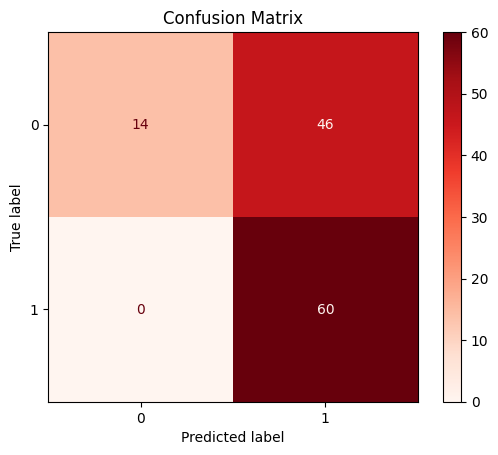

In [858]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = model_predict_with_threshold(x_test)  # custom threshold
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')


##Precison Recall vs Thersholds Curve





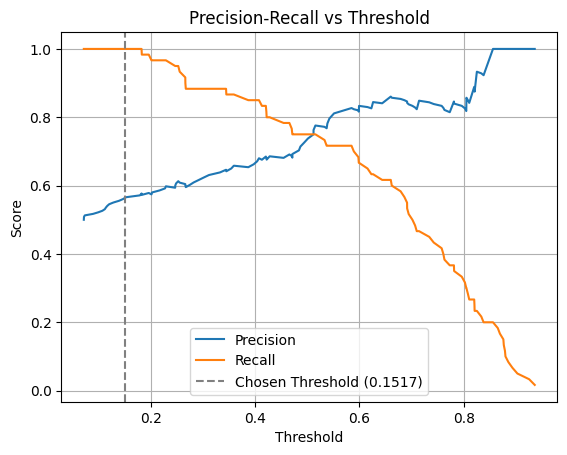

In [859]:
from sklearn.metrics import precision_recall_curve

y_proba1 = model.predict_proba(x_test)[:,1]
precision0, recall0, thresholds0 =precision_recall_curve(y_test, y_proba1)

plt.plot(thresholds0, precision0[:-1], label='Precision')
plt.plot(thresholds0, recall0[:-1], label='Recall')
plt.axvline(0.1517, color='grey', linestyle='--', label='Chosen Threshold (0.1517)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

